<a href="https://colab.research.google.com/github/sc10/My-Projects/blob/main/Stock_Price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance


     |████████████████████████████████| 6.3 MB 7.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=8c5db02781db4ddfbd542315a49a4da0c1705fb46bed6a1222b3a153e4c18fbe
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import pandas as pd
import yfinance as yf
import datetime 
import time
import requests
import io
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

In [3]:
from datetime import date
end = date.today()
start=end-datetime.timedelta(days=365)


In [4]:
stock_final=pd.DataFrame()
code=input("Enter the code of stock you want to predict value of: ")
stock = yf.download(code,start=start, end=end, progress=False)
stock_final = stock_final.append(stock,sort=False)


Enter the code of stock you want to predict value of: tcs.ns


In [5]:
stock_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-24,2154.500000,2163.0,2125.100098,2157.399902,2129.076904,3665100
2020-07-27,2165.000000,2215.0,2163.500000,2206.800049,2177.828369,4248480
2020-07-28,2215.000000,2320.0,2215.000000,2309.750000,2279.427002,8092319
2020-07-29,2292.000000,2342.0,2246.050049,2276.050049,2246.169434,6090431
2020-07-30,2285.899902,2358.0,2272.250000,2279.500000,2249.573975,7098496


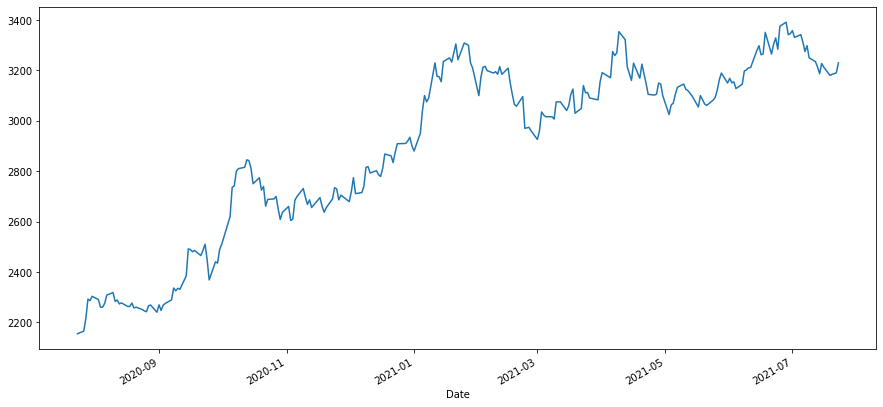

In [6]:
stock_final['Open'].plot(label = code, figsize = (15,7))

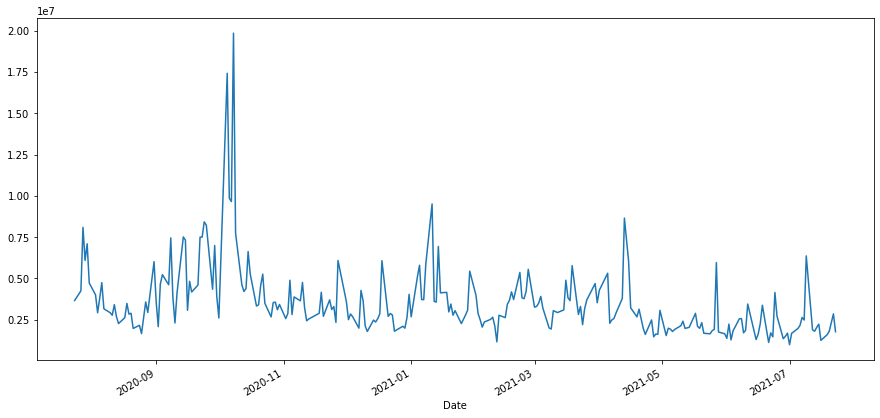

In [7]:
stock_final['Volume'].plot(label=code,figsize =(15,7))

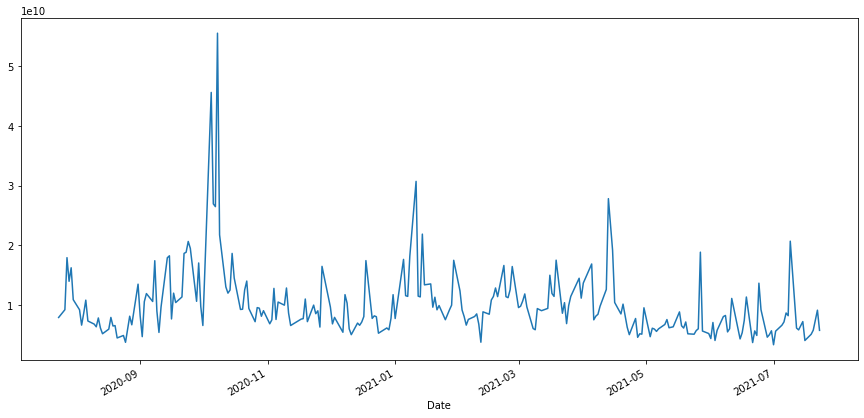

In [8]:
stock_final['Market_Cap']=stock_final['Open']*stock_final['Volume']
stock_final['Market_Cap'].plot(label=code, figsize=(15,7))

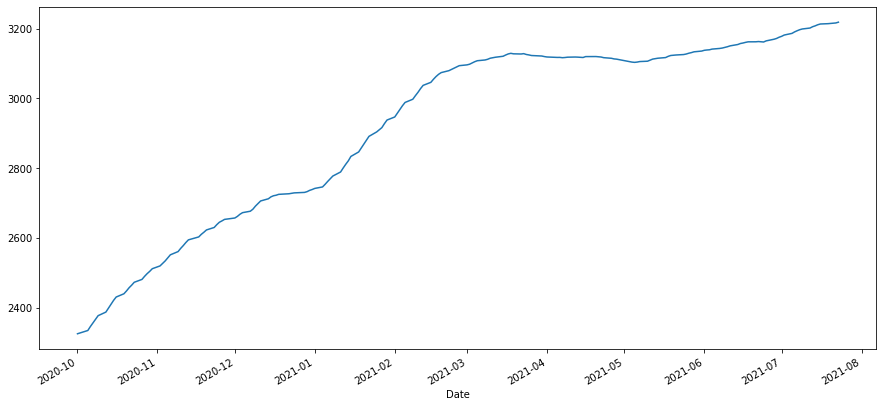

In [9]:
stock_final['MA50'] = stock_final['Open'].rolling(50).mean()
stock_final['MA50'].plot(label=code, figsize=(15,7))

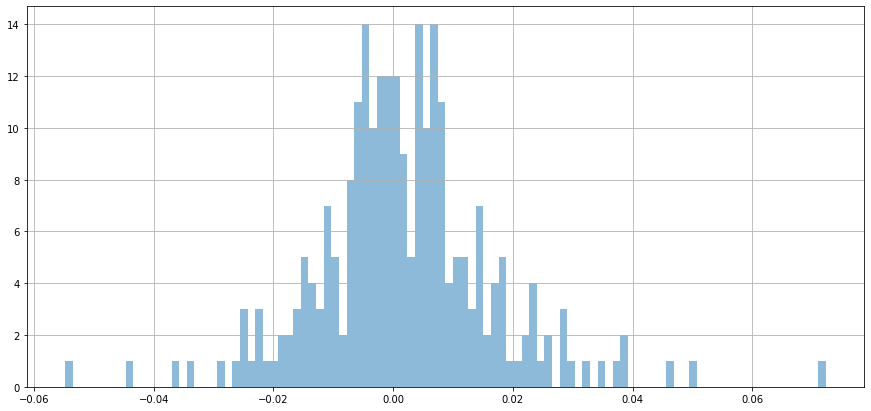

In [10]:
stock_final['returns'] = (stock_final['Close']/stock_final['Close'].shift(1)) -1
stock_final['returns'].hist(bins = 100, label = code, alpha = 0.5, figsize = (15,7))

In [11]:
stock_final

,Open,High,Low,Close,Adj Close,Volume,Market_Cap,MA50,returns
Date,,,,,,,,,
2020-07-24,2154.500000,2163.000000,2125.100098,2157.399902,2129.076904,3665100,7.896458e+09,NaN,NaN
2020-07-27,2165.000000,2215.000000,2163.500000,2206.800049,2177.828369,4248480,9.197959e+09,NaN,0.022898
2020-07-28,2215.000000,2320.000000,2215.000000,2309.750000,2279.427002,8092319,1.792449e+10,NaN,0.046651
2020-07-29,2292.000000,2342.000000,2246.050049,2276.050049,2246.169434,6090431,1.395927e+10,NaN,-0.014590
2020-07-30,2285.899902,2358.000000,2272.250000,2279.500000,2249.573975,7098496,1.622645e+10,NaN,0.001516
...,...,...,...,...,...,...,...,...,...
2021-07-16,3213.000000,3219.850098,3192.000000,3194.800049,3194.800049,1256526,4.037218e+09,3213.778008,-0.002544
2021-07-19,3180.000000,3199.800049,3176.000000,3184.600098,3184.600098,1597058,5.078644e+09,3214.718008,-0.003193
2021-07-20,3184.600098,3215.000000,3156.149902,3205.800049,3205.800049,1811945,5.770320e+09,3215.491011,0.006657


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [14]:
stock_final.head()

,Open,High,Low,Close,Adj Close,Volume,Market_Cap,MA50,returns
Date,,,,,,,,,
2020-07-24,2154.500000,2163.0,2125.100098,2157.399902,2129.076904,3665100,7.896458e+09,NaN,NaN
2020-07-27,2165.000000,2215.0,2163.500000,2206.800049,2177.828369,4248480,9.197959e+09,NaN,0.022898
2020-07-28,2215.000000,2320.0,2215.000000,2309.750000,2279.427002,8092319,1.792449e+10,NaN,0.046651
2020-07-29,2292.000000,2342.0,2246.050049,2276.050049,2246.169434,6090431,1.395927e+10,NaN,-0.014590
2020-07-30,2285.899902,2358.0,2272.250000,2279.500000,2249.573975,7098496,1.622645e+10,NaN,0.001516


In [16]:
x=stock_final[['Open','High','Low','Volume','Market_Cap']].values
y=stock_final['Close'].values

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
reg=LinearRegression()


In [19]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
pred=reg.predict(x_test)

In [22]:
 dframe=pd.DataFrame({"Actual": y_test.flatten(),"Predicted": pred.flatten()})

In [23]:
dframe

,Actual,Predicted
0,3212.850098,3219.287520
1,3064.850098,3081.081777
2,2649.600098,2665.406677
3,2894.300049,2910.965291
4,3071.850098,3048.464397
5,2685.699951,2688.343167
6,2422.300049,2407.846473
7,3057.949951,3081.609615
8,3216.800049,3205.394448
9,3141.250000,3129.170622


In [24]:
graph=dframe.head(10)

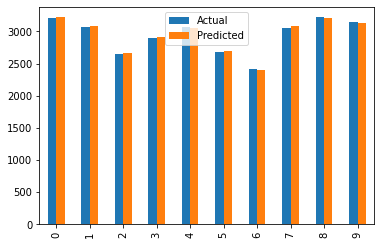

In [25]:
graph.plot(kind="bar")

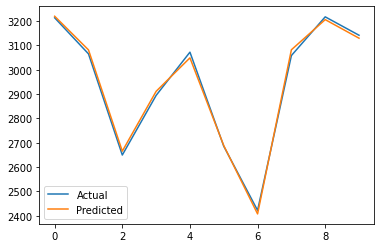

In [27]:
graph.plot(kind="line")